In [1]:
%matplotlib inline
import pandas as pd
import statsmodels.api as sm
import numpy as np

/Users/mrefermat/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
import seaborn as sns
import pylab
sns.set(font_scale=3)
import math
pylab.rcParams['figure.figsize'] = (24, 18)

In [3]:
import quandl as q
token="Us3wFmXGgAj_1cUtHAAR"

In [43]:
import quandl as q
token="Us3wFmXGgAj_1cUtHAAR"
def calc_risk_parity(vol=.1,lookback=36,cash=True):
    df=pd.DataFrame()
    df['SP500']=q.get("CHRIS/CME_SP1", authtoken=token).resample(rule='m').last().Last
    df['US10Y']=q.get("CHRIS/CME_US1", authtoken=token).resample(rule='m').last().Last
    data_pct=df.pct_change()
    rtns=((data_pct/pd.DataFrame.ewm(data_pct,lookback,min_periods=lookback/3.).std())*(vol/math.sqrt(12))).dropna()
    mat=pd.DataFrame.ewm(data_pct,lookback,min_periods=lookback/3.).corr().dropna()
    sf=pd.Series()
    for d,dd in mat.groupby(level=0):
        sf[d]=1/math.sqrt(dd.mean().mean())
    final= rtns.multiply(sf,axis=0).dropna().mean(axis=1)
    if cash:
        tres=q.get("USTREASURY/YIELD", authtoken=token)['3 MO'].resample(rule='m').last()/1200
        return final+tres
    else:
        return final

Text(0.99,0.01,'pandascodesnippets.blogspot.com.au')

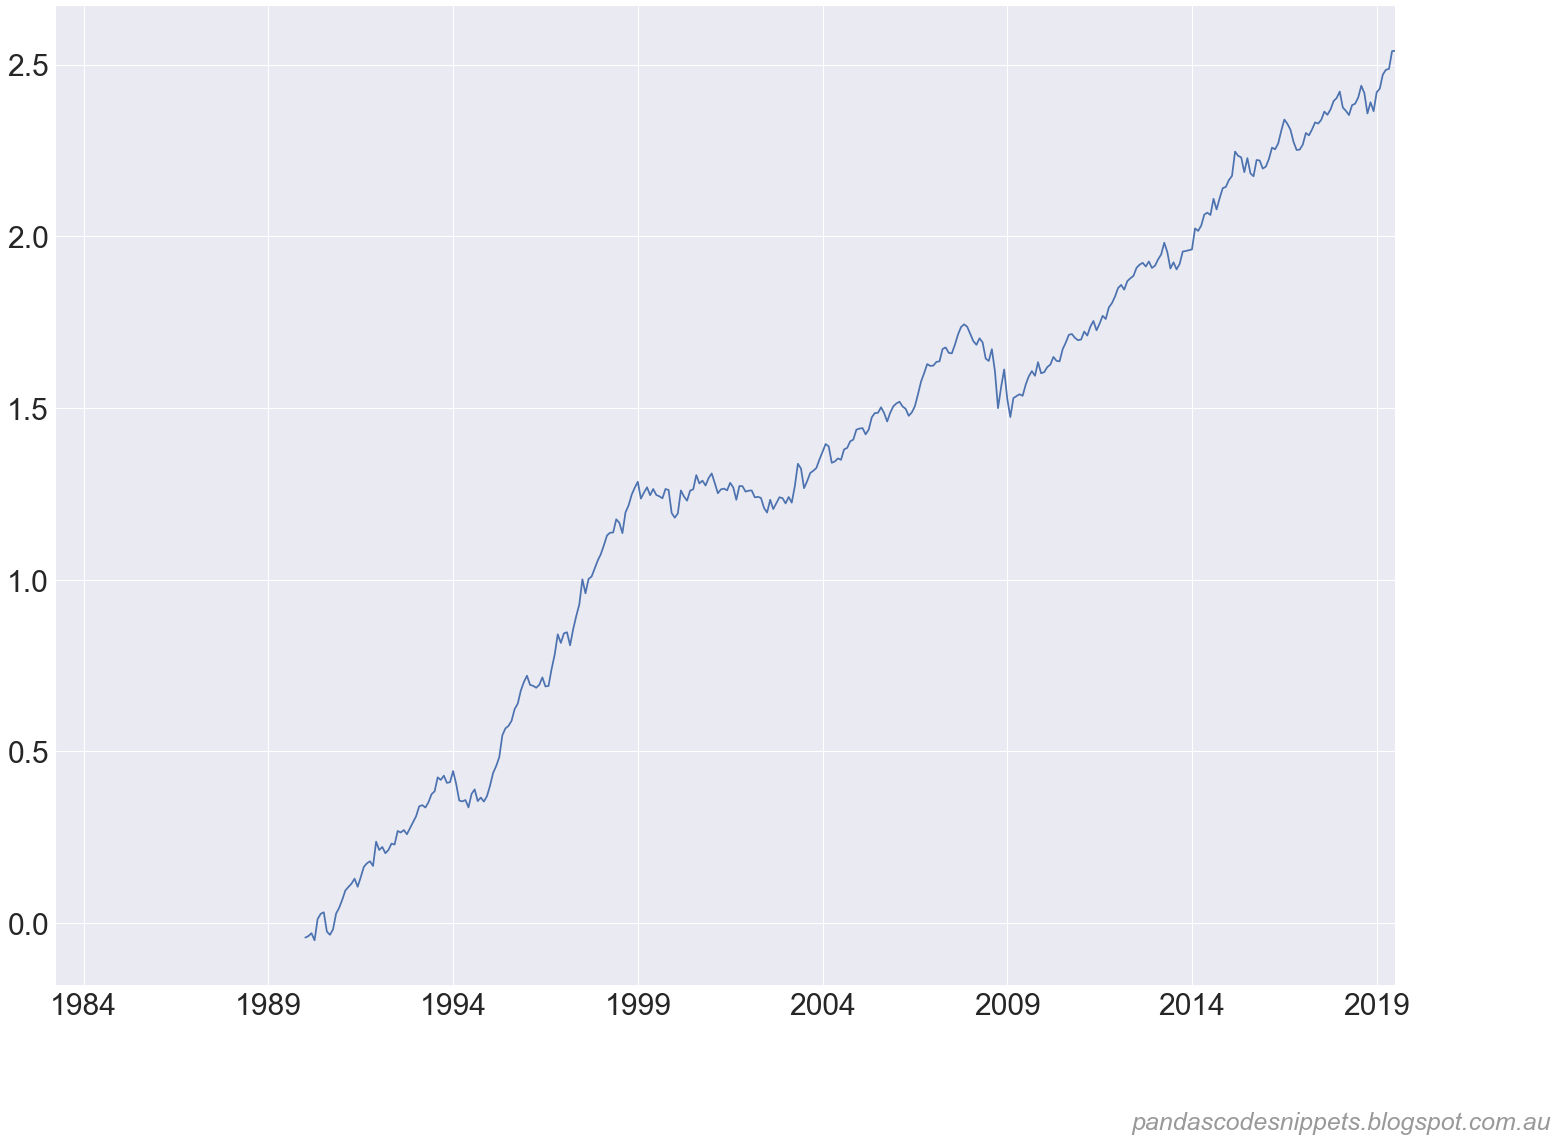

In [52]:
ax=calc_risk_parity().ffill().cumsum().plot()


# Volatility autocorrelation 

In [7]:
df=pd.DataFrame()
df['SP500']=q.get("CHRIS/CME_SP1", authtoken=token).resample(rule='m').last().Last
df['US10Y']=q.get("CHRIS/CME_US1", authtoken=token).resample(rule='m').last().Last
data_pct=df.pct_change()

In [10]:
data_pct.SP500.autocorr()

0.013124116358042745

In [19]:
data_pct.US10Y.autocorr()

0.025447361991689912

In [127]:
vol=pd.DataFrame.ewm(data_pct,24,min_periods=3).std().dropna()

In [17]:
vol.US10Y.autocorr()

0.9881569238877036

In [18]:
vol.SP500.autocorr()

0.98546148633030461

In [91]:
import math

In [93]:
data_pct['2000':].std()*math.sqrt(12)

SP500    0.147397
US10Y    0.100960
dtype: float64

In [135]:
vol=pd.DataFrame.ewm(data_pct,36,min_periods=12).std().dropna()
scat=pd.DataFrame()
scat['Volatility']=vol.SP500*math.sqrt(12)
scat['Returns']=data_pct.SP500

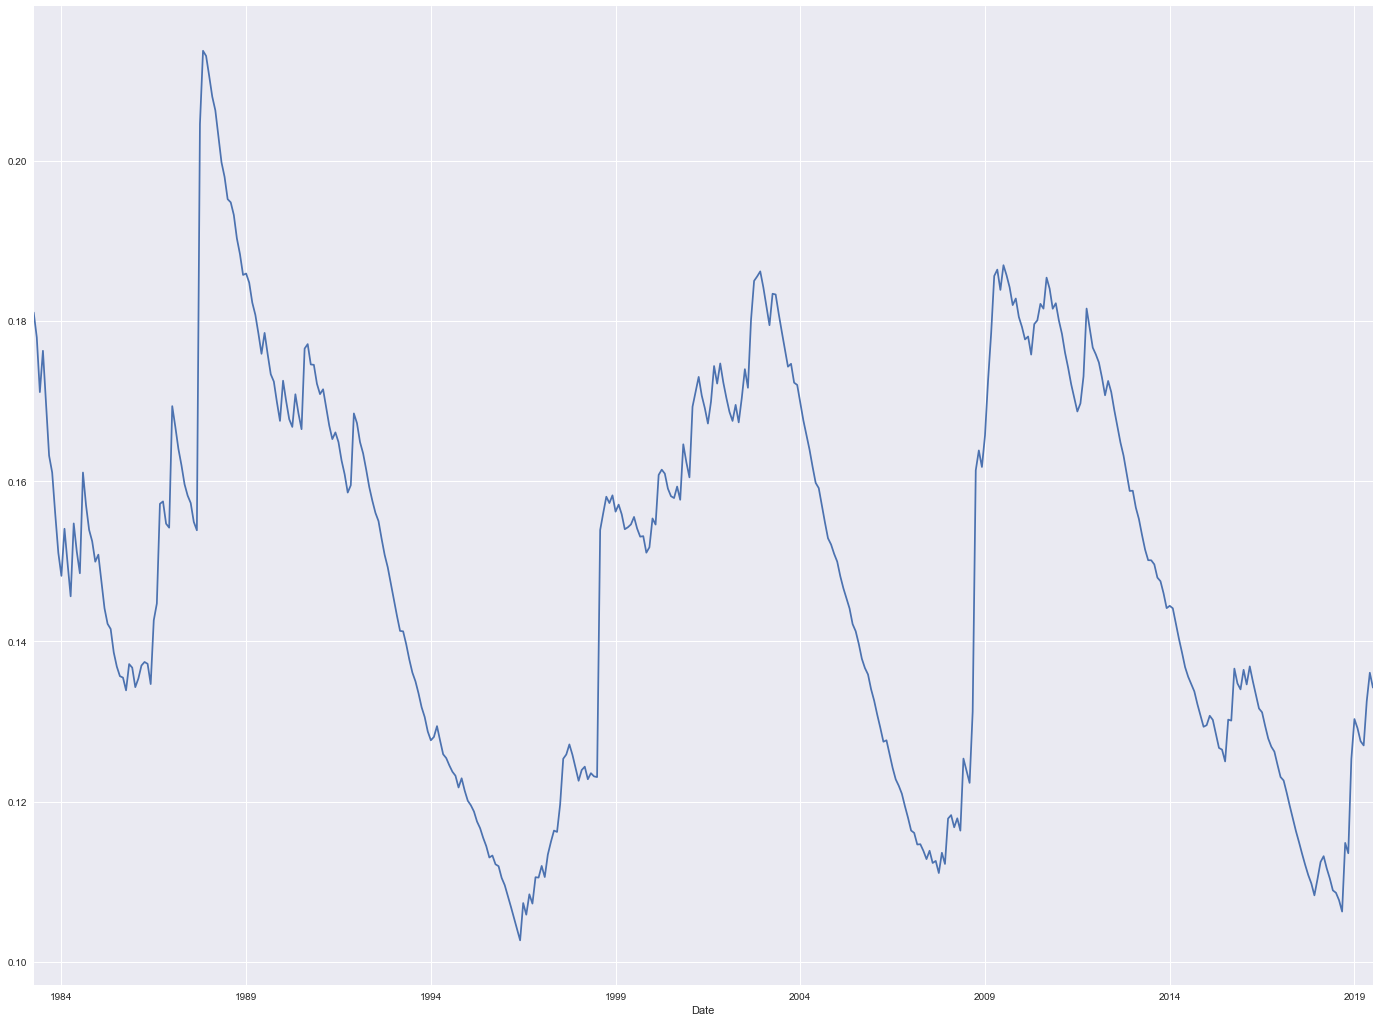

In [136]:
scat.Volatility.plot()

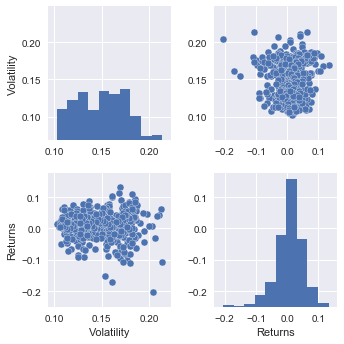

In [137]:
sns.pairplot(scat)

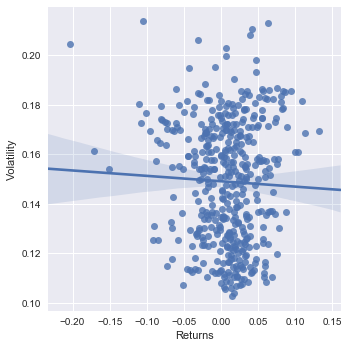

In [140]:
sns.set(font_scale=1)
sns.lmplot(x="Returns", y="Volatility", data=scat, order=1)

# Add cash returns

In [94]:
rp=calc_risk_parity().ffill()

Text(0.1,0.02,'Constructed using equal risk from S&P 500 future and US 10 year treasury future with a 3 year lookback \n and three month treasury return for excess cash.  Past performance is not indeicative of future returns. \n This is not indended as investment advice.  Source: Quandl. As of July 2019.')

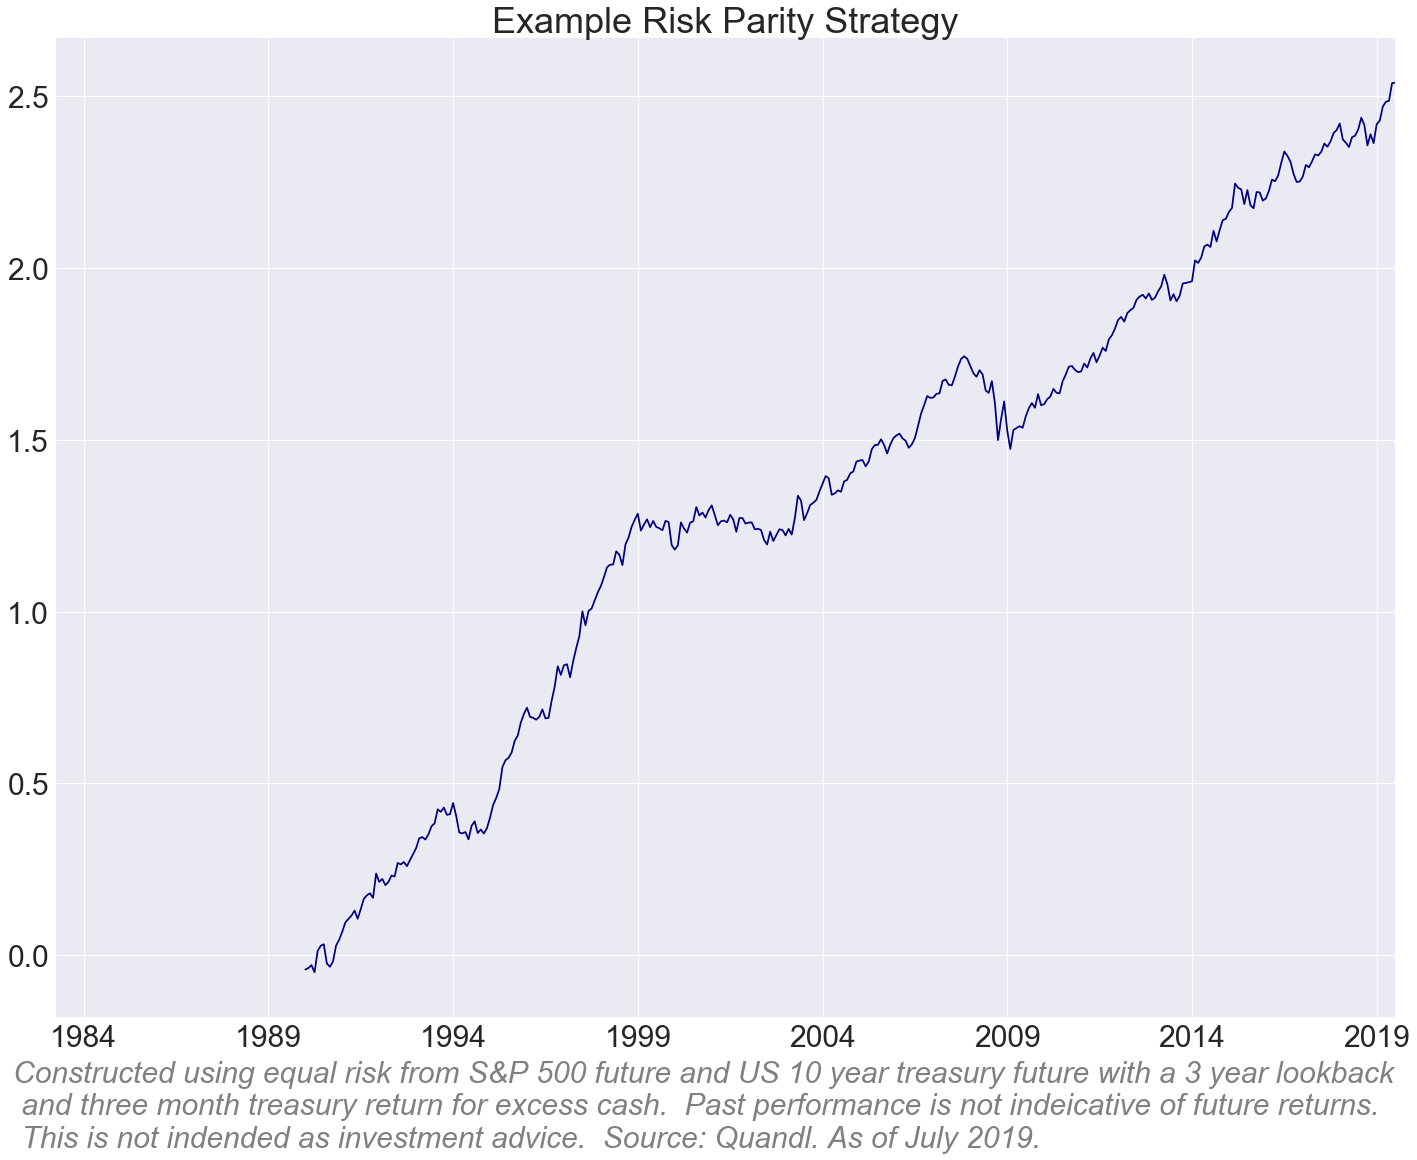

In [95]:
ax=rp.cumsum().plot(colormap='jet',title='Example Risk Parity Strategy')
fig = ax.get_figure()
fig.text(0.1, 0.02, 'Constructed using equal risk from S&P 500 future and US 10 year treasury future with a 3 year lookback \n and three month treasury return for excess cash.  Past performance is not indeicative of future returns. \n This is not indended as investment advice.  Source: Quandl. As of July 2019.', 
         ha='left', va='bottom',
        fontsize='small', fontstyle='italic', color='gray')